In [1]:
# Fix relative import for utils
#import sys
#if '..' not in sys.path: sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils import load_config
base_config = load_config()['base']

In [4]:
base_config

{'data': {'root': 'data/',
  'images_raw': 'adni_raw/',
  'images_processed': 'SPM_preprocessed_normalized/ADNI1/',
  'images_category': 'SPM_categorised/ADNI1/',
  'images_meta': 'meta/',
  'delimiter': '_',
  'classes': {'CN': 0, 'MCI': 1, 'AD': 2}},
 'logs': {'root': 'logs/', 'nn': 'neural_network/', 'vis': 'visualisation/'},
 'meta': {'filename_raw': ['projectIdentifier',
   'subject.subjectIdentifier',
   'subject.study.series.modality',
   'subject.study.imagingProtocol.description',
   'subject.study.series.dateAcquiredPrecise',
   'image_nbr',
   'series',
   'subject.study.imagingProtocol.imageUID',
   'filename',
   'path'],
  'filename_category': ['subject.researchGroup',
   'subject.subjectIdentifier',
   'subject.study.imagingProtocol.imageUID',
   'image_nbr',
   'filename',
   'path'],
  'filename_processed': ['projectIdentifier',
   'subject.subjectIdentifier',
   'subject.study.series.modality',
   'subject.study.imagingProtocol.description',
   'subject.study.series.d

In [5]:
from utils import misc_util
from utils import display as dplay
from utils import Adni

import os
import numpy as np
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
adni = Adni(
    rootdir=base_config['data']['root'], 
    metadir=base_config['data']['images_meta'],
    rawdir=base_config['data']['images_raw'],
    images_category=base_config['data']['images_category'],
    processeddir=base_config['data']['images_processed'],
    filename_raw=base_config['meta']['filename_raw'],
    filename_processed=base_config['meta']['filename_processed'],
    filename_category=base_config['meta']['filename_category'],
    use_processed=True)


# Load data

In [7]:
adni.load(show_output=False)

('data/SPM_preprocessed_normalized/ADNI1/', ['projectIdentifier', 'subject.subjectIdentifier', 'subject.study.series.modality', 'subject.study.imagingProtocol.description', 'subject.study.series.dateAcquiredPrecise', 'image_nbr', 'series', 'subject.study.imagingProtocol.imageUID', 'filename', 'path'], <bound method Adni.info_from_raw_filename of <utils.adni.Adni object at 0x7f127a57d400>>)


## Display MetaData

In [8]:
meta_df = adni.meta_to_df()

Processing type of:
	 category: subject.researchGroup
	 datetime64[ns]: subject.study.series.dateAcquired


In [9]:
dplay.display_all_pd_cols(meta_df)

,projectIdentifier,projectDescription,siteKey,subject.subjectIdentifier,subject.researchGroup,subject.subjectSex,subject.subjectInfo.APOE_A1,subject.subjectInfo.APOE_A2,subject.visit.visitIdentifier,subject.visit.assessment.component.assessmentScore.MMSCORE,subject.visit.assessment.component.assessmentScore.GDTOTAL,subject.visit.assessment.component.assessmentScore.CDGLOBAL,subject.visit.assessment.component.assessmentScore.NPISCORE,subject.visit.assessment.component.assessmentScore.FAQTOTAL,subject.study.studyIdentifier,subject.study.subjectAge,subject.study.ageQualifier,subject.study.weightKg,subject.study.postMortem,subject.study.series.seriesIdentifier,subject.study.series.modality,subject.study.series.dateAcquired,subject.study.imagingProtocol.imageUID,subject.study.imagingProtocol.description,subject.study.imagingProtocol.protocolTerm.protocol.Manufacturer,subject.study.imagingProtocol.protocolTerm.protocol.Mfg_Model,subject.study.imagingProtocol.protocolTerm.protocol.Radiopharmaceutical,subject.study.imagingProtocol.protocolTerm.protocol.Number_of_Rows,subject.study.imagingProtocol.protocolTerm.protocol.Number_of_Columns,subject.study.imagingProtocol.protocolTerm.protocol.Number_of_Slices,subject.study.imagingProtocol.protocolTerm.protocol.Frames,subject.study.imagingProtocol.protocolTerm.protocol.Pixel_Spacing_X,subject.study.imagingProtocol.protocolTerm.protocol.Pixel_Spacing_Y,subject.study.imagingProtocol.protocolTerm.protocol.Slice_Thickness,subject.study.imagingProtocol.protocolTerm.protocol.Convolution_Kernel,subject.study.imagingProtocol.protocolTerm.protocol.Counts_Source,subject.study.imagingProtocol.protocolTerm.protocol.Attenuation_Correction,subject.study.imagingProtocol.protocolTerm.protocol.Decay_Correction,subject.study.imagingProtocol.protocolTerm.protocol.Reconstruction,subject.study.imagingProtocol.protocolTerm.protocol.Scatter_Correction,subject.study.imagingProtocol.protocolTerm.protocol.Radioisotope,subject.study.imagingProtocol.protocolTerm.protocol.Randoms_Correction
552,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,002_S_1155,MCI,M,3.0,3.0,ADNI3 Initial Visit-Cont Pt,NaN,NaN,NaN,NaN,NaN,110661,68.2464,Y,65.7700,F,559508,PET,2017-04-28,I844882,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.00000,2.00000,2.000,NaN,EMISSION,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,DLYD
660,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,002_S_4225,CN,M,3.0,4.0,ADNI3 Initial Visit-Cont Pt,NaN,NaN,NaN,NaN,NaN,128889,77.0897,Y,80.7400,F,748996,PET,2018-11-16,I1075221,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.00000,2.00000,2.000,NaN,EMISSION,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,DLYD
174,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,002_S_6652,MCI,F,NaN,NaN,ADNI Baseline,NaN,NaN,NaN,NaN,NaN,135932,86.4668,Y,73.4800,F,818824,PET,2019-01-18,I1158636,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,89.0,6.0,2.00000,2.00000,2.000,NaN,EMISSION,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,DLYD
161,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,002_S_6695,MCI,M,NaN,NaN,ADNI Baseline,NaN,NaN,NaN,NaN,NaN,135434,66.4120,Y,61.6900,F,814384,PET,2019-04-09,I1152976,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.00000,2.00000,2.000,NaN,EMISSION,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,DLYD
524,ADNI,Alzheimer's Disease Neuroimaging Initiative,3,003_S_0908,MCI,F,2.0,3.0,ADNI3 Initial Visit-Cont Pt,NaN,NaN,NaN,NaN,NaN,120929,74.4203,Y,73.0284,F,667285,PET,2018-03-13,I974047,ADNI3_FDG (AC),SIEMENS,Biograph64_TruePoint,18F-FDG,336.0,336.0,109.0,6.0,1.01821,1.01821,2.027,All-pass,EMISSION,"measured,AC_CT",START,OSEM3D 4i21s,Model-based,F-18,DLYD


# Display ImageFiles

In [10]:
files_df = adni.files_to_df()

In [11]:
dplay.display_all_pd_cols(files_df)

,projectIdentifier,subject.subjectIdentifier,subject.study.series.modality,subject.study.imagingProtocol.description,subject.study.series.dateAcquiredPrecise,image_nbr,series,subject.study.imagingProtocol.imageUID,filename,path
0,ADNI,041_S_1418,PET,30_min_3D_FDG__4i_16s_,20101108092713710,1,S94411,I203170,iwADNI_041_S_1418_PET_30_min_3D_FDG__4i_16s__b...,data/SPM_preprocessed_normalized/ADNI1/iwADNI_...
1,ADNI,018_S_0142,PT,ADNI_Static_Brain__6x5__,20090211165243667,1,S62959,I135811,iwADNI_018_S_0142_PT_ADNI_Static_Brain__6x5___...,data/SPM_preprocessed_normalized/ADNI1/iwADNI_...
2,ADNI,012_S_1175,PT,ADNIstaticBrain_6x5_,20090115133549590,15,S61892,I133846,iwADNI_012_S_1175_PT_ADNIstaticBrain_6x5__br_r...,data/SPM_preprocessed_normalized/ADNI1/iwADNI_...
3,ADNI,072_S_1380,PT,ADNI_BRAIN,20100402132501438,21,S82719,I170088,iwADNI_072_S_1380_PT_ADNI_BRAIN_br_raw_2010040...,data/SPM_preprocessed_normalized/ADNI1/iwADNI_...
4,ADNI,012_S_1165,PT,ADNIstaticBrain_6x5_,20090121121957236,12,S62063,I134221,iwADNI_012_S_1165_PT_ADNIstaticBrain_6x5__br_r...,data/SPM_preprocessed_normalized/ADNI1/iwADNI_...


In [12]:
df = adni.to_df()

Processing type of:
	 category: subject.researchGroup
	 datetime64[ns]: subject.study.series.dateAcquired


In [13]:
dplay.display_all_pd_cols(df)

,projectIdentifier_x,subject.subjectIdentifier,subject.study.series.modality_x,subject.study.imagingProtocol.description_x,subject.study.series.dateAcquiredPrecise,image_nbr,series,subject.study.imagingProtocol.imageUID,filename,path,projectIdentifier_y,projectDescription,siteKey,subject.researchGroup,subject.subjectSex,subject.subjectInfo.APOE_A1,subject.subjectInfo.APOE_A2,subject.visit.visitIdentifier,subject.visit.assessment.component.assessmentScore.MMSCORE,subject.visit.assessment.component.assessmentScore.GDTOTAL,subject.visit.assessment.component.assessmentScore.CDGLOBAL,subject.visit.assessment.component.assessmentScore.NPISCORE,subject.visit.assessment.component.assessmentScore.FAQTOTAL,subject.study.studyIdentifier,subject.study.subjectAge,subject.study.ageQualifier,subject.study.weightKg,subject.study.postMortem,subject.study.series.seriesIdentifier,subject.study.series.modality_y,subject.study.series.dateAcquired,subject.study.imagingProtocol.description_y,subject.study.imagingProtocol.protocolTerm.protocol.Manufacturer,subject.study.imagingProtocol.protocolTerm.protocol.Mfg_Model,subject.study.imagingProtocol.protocolTerm.protocol.Radiopharmaceutical,subject.study.imagingProtocol.protocolTerm.protocol.Number_of_Rows,subject.study.imagingProtocol.protocolTerm.protocol.Number_of_Columns,subject.study.imagingProtocol.protocolTerm.protocol.Number_of_Slices,subject.study.imagingProtocol.protocolTerm.protocol.Frames,subject.study.imagingProtocol.protocolTerm.protocol.Pixel_Spacing_X,subject.study.imagingProtocol.protocolTerm.protocol.Pixel_Spacing_Y,subject.study.imagingProtocol.protocolTerm.protocol.Slice_Thickness,subject.study.imagingProtocol.protocolTerm.protocol.Convolution_Kernel,subject.study.imagingProtocol.protocolTerm.protocol.Counts_Source,subject.study.imagingProtocol.protocolTerm.protocol.Attenuation_Correction,subject.study.imagingProtocol.protocolTerm.protocol.Decay_Correction,subject.study.imagingProtocol.protocolTerm.protocol.Reconstruction,subject.study.imagingProtocol.protocolTerm.protocol.Scatter_Correction,subject.study.imagingProtocol.protocolTerm.protocol.Radioisotope,subject.study.imagingProtocol.protocolTerm.protocol.Randoms_Correction
0,ADNI,041_S_1418,PET,30_min_3D_FDG__4i_16s_,20101108092713710,1,S94411,I203170,iwADNI_041_S_1418_PET_30_min_3D_FDG__4i_16s__b...,data/SPM_preprocessed_normalized/ADNI1/iwADNI_...,ADNI,Alzheimer's Disease Neuroimaging Initiative,41,MCI,M,3.0,3.0,ADNI1/GO Month 36,30.0,2.0,0.5,5.0,4.0,29612,84.90,Y,74.39,F,94411,PET,2010-11-05,30 min 3D FDG 4i/16s,Siemens/CTI,HR+,18F-FDG,128.0,128.0,63.0,6.0,2.05940,2.05940,2.425,ramp,Dynamic emission,Measured,Start,CPU terative,Simulated 3D,F-18,NaN
1,ADNI,018_S_0142,PT,ADNI_Static_Brain__6x5__,20090211165243667,1,S62959,I135811,iwADNI_018_S_0142_PT_ADNI_Static_Brain__6x5___...,data/SPM_preprocessed_normalized/ADNI1/iwADNI_...,ADNI,Alzheimer's Disease Neuroimaging Initiative,18,MCI,M,3.0,4.0,ADNI1/GO Month 36,30.0,1.0,0.5,1.0,0.0,19796,82.34,Y,69.40,F,62959,PET,2009-02-11,ADNI Static Brain (6x5),GEMS,Advance,18F-FDG,128.0,128.0,35.0,6.0,2.00000,2.00000,4.250,Rad: rectangle 4.000000 mm Ax: rectangle 8.500...,EMISSION,NaN,START,3D Kinahan - Rogers,Gaussian Fit,F-18,RTSUB
2,ADNI,012_S_1175,PT,ADNIstaticBrain_6x5_,20090115133549590,15,S61892,I133846,iwADNI_012_S_1175_PT_ADNIstaticBrain_6x5__br_r...,data/SPM_preprocessed_normalized/ADNI1/iwADNI_...,ADNI,Alzheimer's Disease Neuroimaging Initiative,12,MCI,M,3.0,3.0,ADNI1/GO Month 24,29.0,0.0,0.5,3.0,7.0,19389,74.80,Y,98.43,F,61892,PET,2009-01-15,ADNIstaticBrain(6x5),GE MEDICAL SYSTEMS,Discovery LS,18F-FDG,128.0,128.0,35.0,6.0,2.00000,2.00000,4.250,Rad: rectangle 4.000000 mm Ax: recta...,EMISSION,"measured,, 0.096000 cm-1,",START,3D Kinahan - Rogers,Gaussian Fit,F-18,RTSUB
3,ADNI,072_S_1380,PT,ADNI_BRAIN,20100402132501438,21,S82719,I170088,iwADNI_072_S_1380_PT_ADNI_BRAIN_br_raw_2010040...,data/SPM_preprocessed_normalized/ADNI1/iwADNI_...,ADNI,Alzheimer's Disease Neuroimaging Initiative,7

# Analysis

### Overview

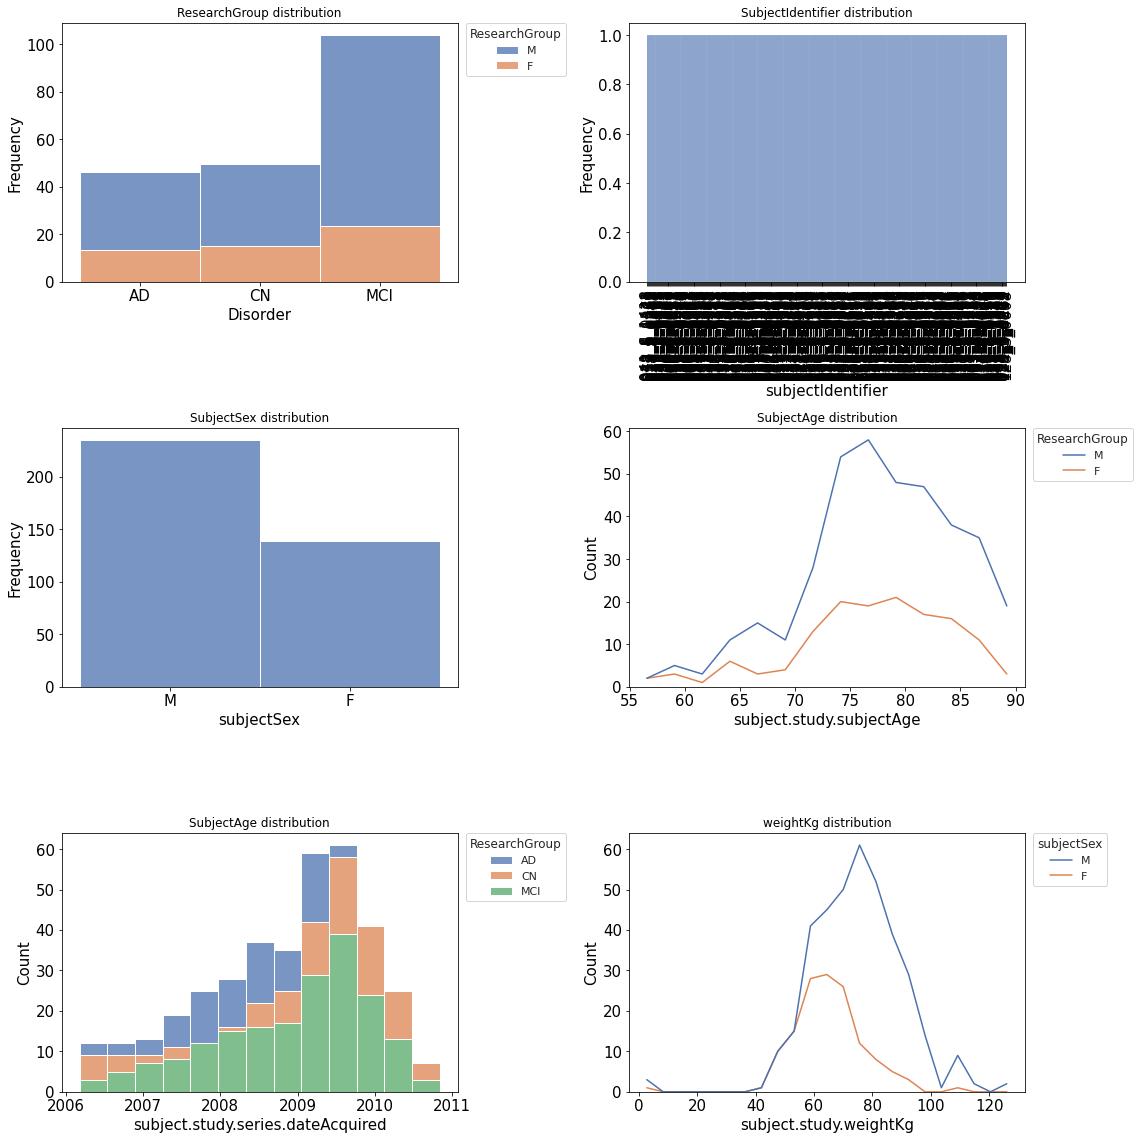

In [14]:
fig, axes = dplay.plot_meta_settings(rows=3)

dplay.do_histplot(
    df, 
    x='subject.researchGroup', 
    hue='subject.subjectSex',
    ax=axes[0,0],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'ResearchGroup distribution','xlabel':'Disorder'}
)

dplay.do_histplot(
    df, 
    x='subject.subjectIdentifier', 
    ax=axes[0,1],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'SubjectIdentifier distribution','xlabel':'subjectIdentifier','rotation':90}
)

dplay.do_histplot(
    df, 
    x='subject.subjectSex', 
    ax=axes[1,0],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'SubjectSex distribution','xlabel':'subjectSex'}
)

dplay.do_histplot(
    df, 
    x='subject.study.subjectAge',
    hue='subject.subjectSex',
    discrete=False,
    ax=axes[1,1],
    plot_kws={'element':'poly','fill':False},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'SubjectAge distribution'}
)

dplay.do_histplot(
    df, 
    x='subject.study.series.dateAcquired',
    hue='subject.researchGroup',
    discrete=False,
    ax=axes[2,0],
    plot_kws={},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'SubjectAge distribution'}
)

dplay.do_histplot(
    df, 
    x='subject.study.weightKg',
    hue='subject.subjectSex',
    discrete=False,
    ax=axes[2,1],
    plot_kws={'element':'poly','fill':False},
    legend_kws={'title':'subjectSex'},
    setting_kws={'title':'weightKg distribution'}
)


plt.show()

### Data sizes

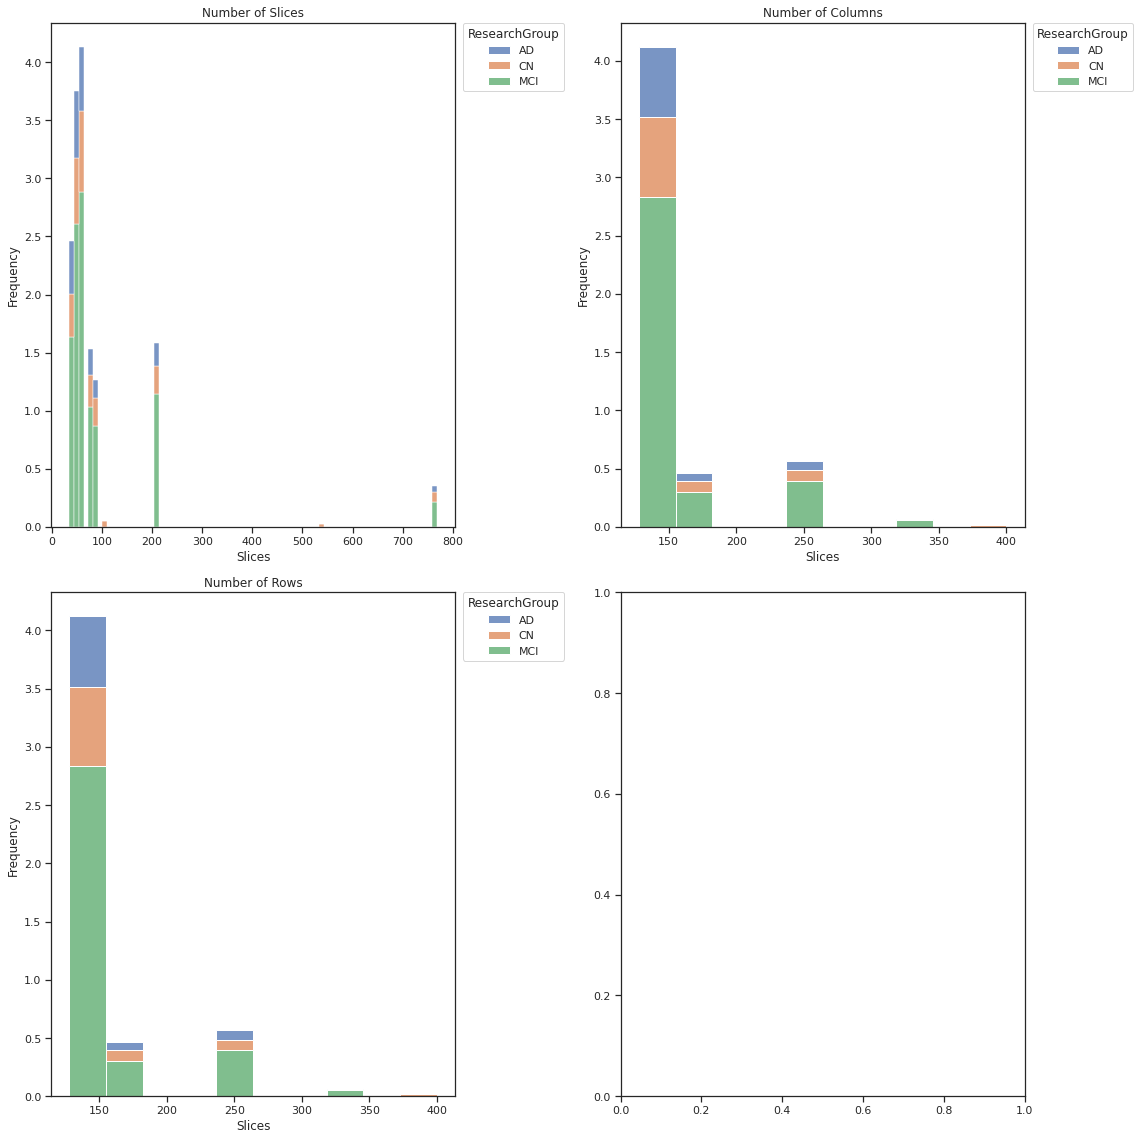

In [15]:
fig, axes = dplay.plot_meta_settings(rows=2)

dplay.do_histplot(
    df, 
    discrete=False,
    x='subject.study.imagingProtocol.protocolTerm.protocol.Number_of_Slices', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[0,0],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'Number of Slices','xlabel':'Slices','ylabel':'Frequency'}
)
dplay.do_histplot(
    df, 
    discrete=False,
    x='subject.study.imagingProtocol.protocolTerm.protocol.Number_of_Columns', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[0,1],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'Number of Columns','xlabel':'Slices','ylabel':'Frequency'}
)
dplay.do_histplot(
    df, 
    discrete=False,
    x='subject.study.imagingProtocol.protocolTerm.protocol.Number_of_Rows', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[1,0],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'Number of Rows','xlabel':'Slices','ylabel':'Frequency'}
)
plt.show()

### Scoring

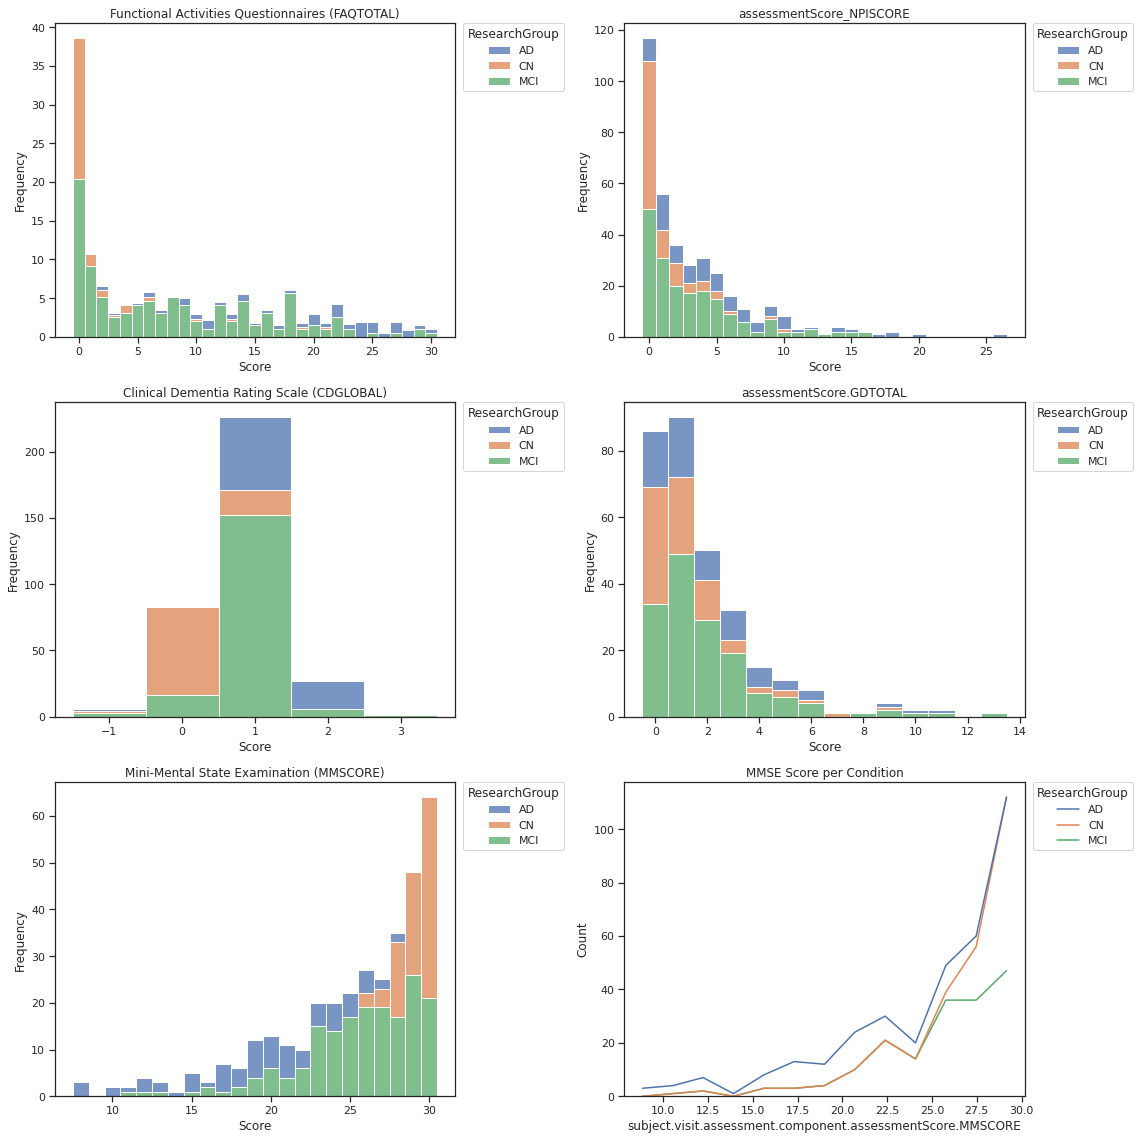

In [16]:
fig, axes = dplay.plot_meta_settings(rows=3)

dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.visit.assessment.component.assessmentScore.FAQTOTAL', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[0,0],
    plot_kws={'stat':'frequency'},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'Functional Activities Questionnaires (FAQTOTAL)','xlabel':'Score','ylabel':'Frequency'}
)

dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.visit.assessment.component.assessmentScore.NPISCORE', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[0,1],
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'assessmentScore_NPISCORE','xlabel':'Score','ylabel':'Frequency'}
)

dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.visit.assessment.component.assessmentScore.CDGLOBAL', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[1,0],
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'Clinical Dementia Rating Scale (CDGLOBAL)','xlabel':'Score','ylabel':'Frequency'}
)

dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.visit.assessment.component.assessmentScore.GDTOTAL', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[1,1],
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'assessmentScore.GDTOTAL','xlabel':'Score','ylabel':'Frequency'}
)

dplay.do_histplot(
    df, 
    discrete=True,
    x='subject.visit.assessment.component.assessmentScore.MMSCORE', 
    hue='subject.researchGroup', 
    multiple='stack',
    ax=axes[2,0],
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'Mini-Mental State Examination (MMSCORE)','xlabel':'Score','ylabel':'Frequency'}
)

dplay.do_histplot(
    df, 
    x='subject.visit.assessment.component.assessmentScore.MMSCORE',
    hue='subject.researchGroup',
    discrete=False,
    ax=axes[2,1],
    plot_kws={'element':'poly','fill':False},
    legend_kws={'title':'ResearchGroup'},
    setting_kws={'title':'MMSE Score per Condition'}
)

plt.show()

## Visualise brain slices

### Create Image generator

In [17]:
SKIP_LAYERS = 10
LIMIT_LAYERS = 70

In [48]:
image_AD_generator = adni.load_images(
    files=adni.load_files(adni.path.category+'AD/', adni.filename_category, use_processed=True)
)
image_CN_generator = adni.load_images(
    files=adni.load_files(adni.path.category+'CN/', adni.filename_category, use_processed=True)
)
image_MCI_generator = adni.load_images(
    files=adni.load_files(adni.path.category+'MCI/', adni.filename_category, use_processed=True)
)

('data/SPM_categorised/ADNI1/AD/', ['subject.researchGroup', 'subject.subjectIdentifier', 'subject.study.imagingProtocol.imageUID', 'image_nbr', 'filename', 'path'], <function split_custom_filename at 0x7f127d731280>)
Root path: data/SPM_categorised/ADNI1/AD/            
Loaded files: 88            
Columns:
	subject.researchGroup
	subject.subjectIdentifier
	subject.study.imagingProtocol.imageUID
	image_nbr
	filename
	path
('data/SPM_categorised/ADNI1/CN/', ['subject.researchGroup', 'subject.subjectIdentifier', 'subject.study.imagingProtocol.imageUID', 'image_nbr', 'filename', 'path'], <function split_custom_filename at 0x7f127d731280>)
Root path: data/SPM_categorised/ADNI1/CN/            
Loaded files: 95            
Columns:
	subject.researchGroup
	subject.subjectIdentifier
	subject.study.imagingProtocol.imageUID
	image_nbr
	filename
	path
('data/SPM_categorised/ADNI1/MCI/', ['subject.researchGroup', 'subject.subjectIdentifier', 'subject.study.imagingProtocol.imageUID', 'image_nbr', 

In [49]:
### Testing functions
from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi

In [50]:
test_image = next(image_CN_generator)

data/SPM_categorised/ADNI1/CN/CN#128_S_0245#I15523#.nii


In [51]:
test_image.shape

(79, 95, 79)

data/SPM_categorised/ADNI1/AD/AD#011_S_0010#I81159#1.nii


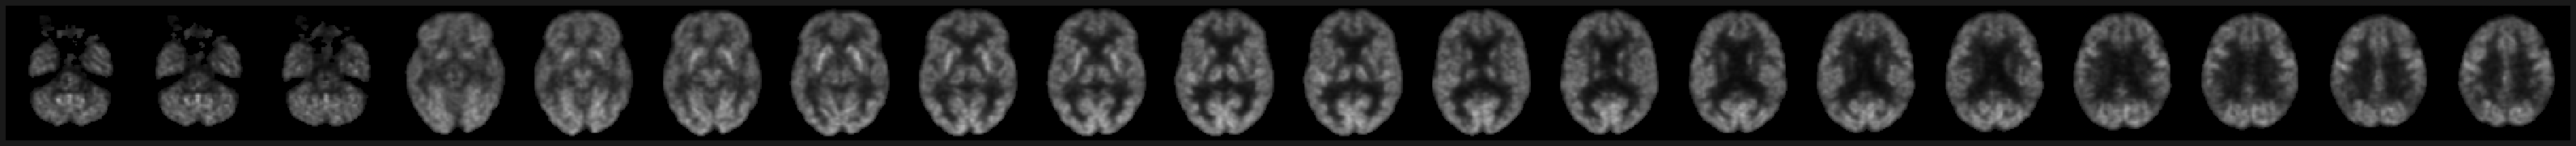

In [52]:
while True:
    test_image = next(image_AD_generator)
    plot_anat(test_image, draw_cross=False, display_mode='z',cut_coords=20,annotate=False)
    plt.show()
    break

In [53]:
images_AD_array = adni.to_array(list(image_AD_generator))
images_CN_array = adni.to_array(list(image_CN_generator))
images_MCI_array = adni.to_array(list(image_MCI_generator))

data/SPM_categorised/ADNI1/AD/AD#029_S_1056#I134157#.nii
data/SPM_categorised/ADNI1/AD/AD#099_S_0470#I106291#1.nii
data/SPM_categorised/ADNI1/AD/AD#012_S_0712#I62078#15.nii
data/SPM_categorised/ADNI1/AD/AD#016_S_0991#I148505#1.nii
data/SPM_categorised/ADNI1/AD/AD#021_S_0343#I104180#6.nii
data/SPM_categorised/ADNI1/AD/AD#022_S_0219#I16827#768.nii
data/SPM_categorised/ADNI1/AD/AD#041_S_1368#I76258#1.nii
data/SPM_categorised/ADNI1/AD/AD#035_S_0341#I103905#1.nii
data/SPM_categorised/ADNI1/AD/AD#127_S_0431#I110307#1.nii
data/SPM_categorised/ADNI1/AD/AD#021_S_1109#I112279#1.nii
data/SPM_categorised/ADNI1/AD/AD#037_S_0627#I71746#1.nii
data/SPM_categorised/ADNI1/AD/AD#033_S_1283#I136762#47.nii
data/SPM_categorised/ADNI1/AD/AD#036_S_1001#I127432#1.nii
data/SPM_categorised/ADNI1/AD/AD#013_S_1161#I134945#1.nii
data/SPM_categorised/ADNI1/AD/AD#114_S_0374#I102362#1.nii
data/SPM_categorised/ADNI1/AD/AD#128_S_0216#I99418#.nii
data/SPM_categorised/ADNI1/AD/AD#018_S_0682#I76465#35.nii
data/SPM_categori

In [58]:
images_AD = next(images_AD_array)
images_CN = next(images_CN_array)
images_MCI = next(images_CN_array)

### Coronal plane (From top)

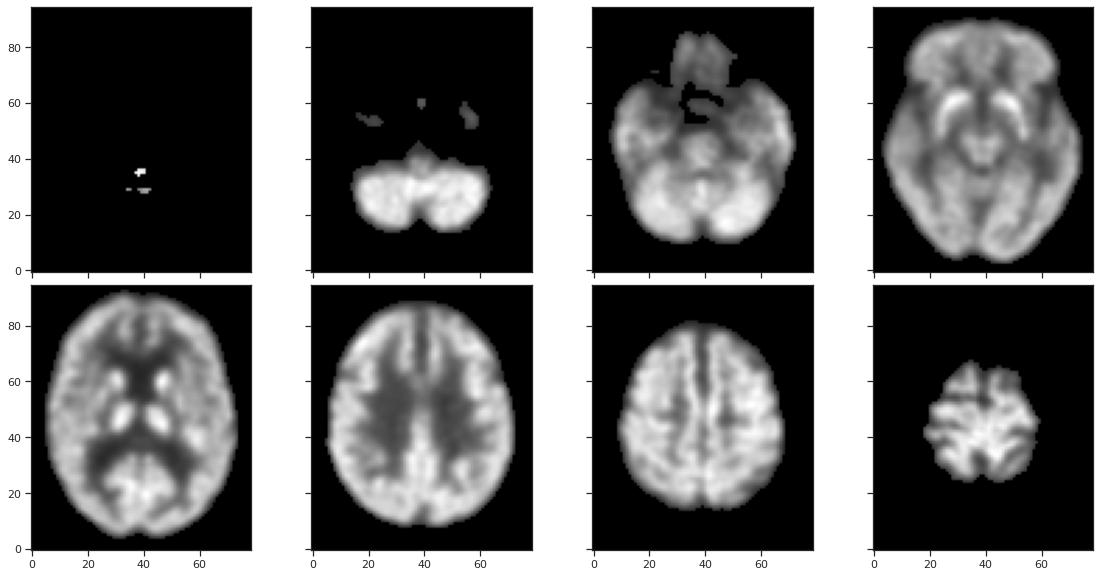

Text(0.5, 0.98, 'Coronal plane - AD')

<Figure size 432x288 with 0 Axes>

In [60]:
image_AD_slices = [images_AD[layer,:,:] for layer in range(0,images_AD.shape[0],SKIP_LAYERS)]
dplay.display_advanced_plot(image_AD_slices)
plt.suptitle("Coronal plane - AD")  

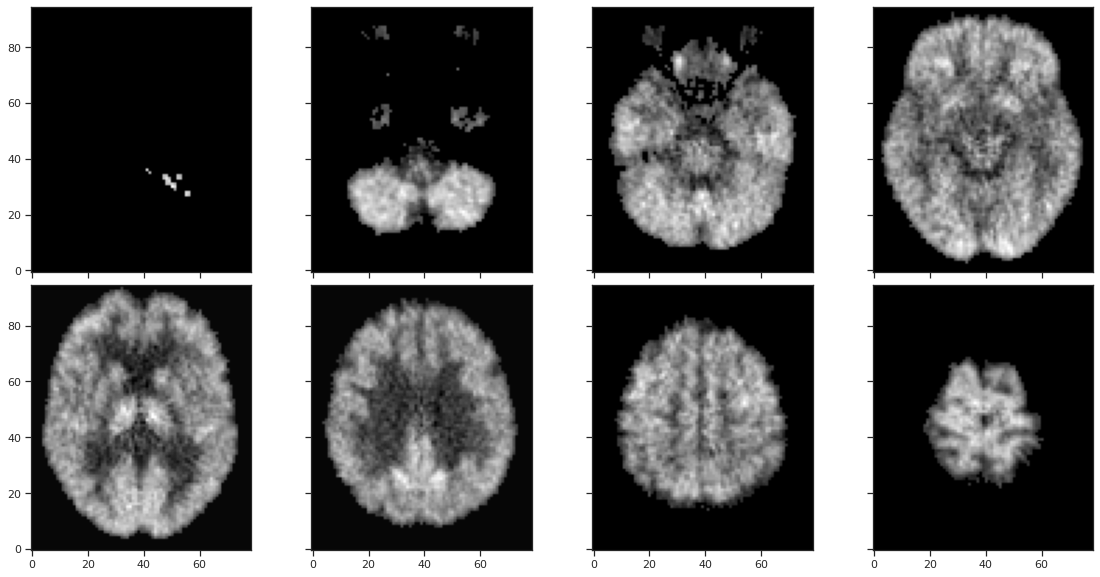

Text(0.5, 0.98, 'Coronal plane - CN')

<Figure size 432x288 with 0 Axes>

In [61]:

image_CN_slices = [images_CN[layer,:,:] for layer in range(0,images_CN.shape[0],SKIP_LAYERS)]
dplay.display_advanced_plot(image_CN_slices)
plt.suptitle("Coronal plane - CN")  

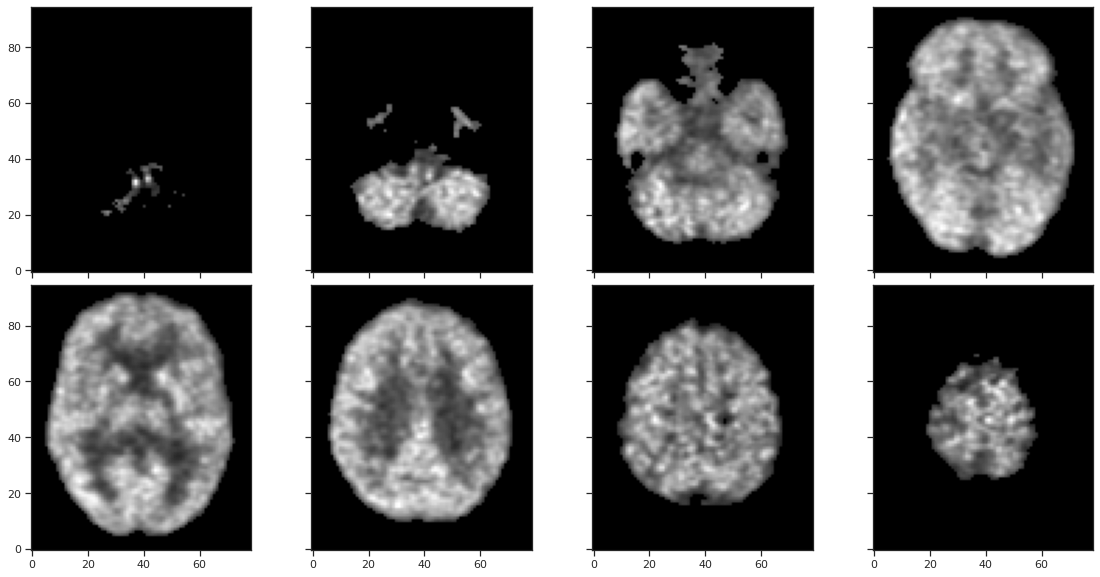

Text(0.5, 0.98, 'Coronal plane - MCI')

<Figure size 432x288 with 0 Axes>

In [62]:
image_MCI_slices = [images_MCI[layer,:,:] for layer in range(0,images_MCI.shape[0],SKIP_LAYERS)]
dplay.display_advanced_plot(image_MCI_slices)
plt.suptitle("Coronal plane - MCI")  

### Sagittal plane (From front)

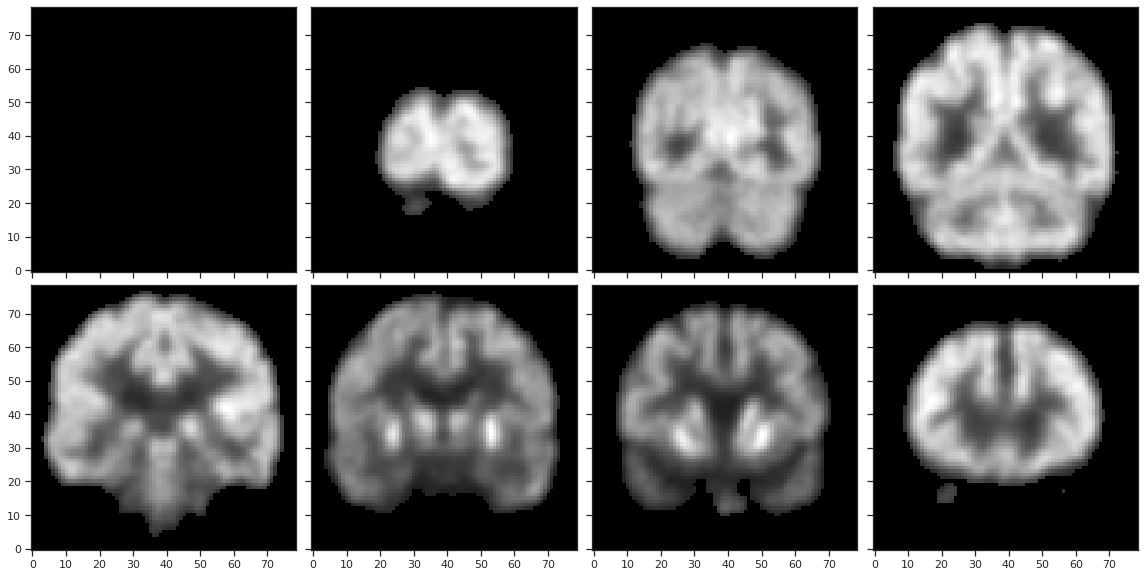

Text(0.5, 0.98, 'Sagittal plane')

<Figure size 432x288 with 0 Axes>

In [63]:
image_slices = [images_AD[:,layer,:] for layer in range(0,images_AD.shape[1], SKIP_LAYERS)]
dplay.display_advanced_plot(image_slices)
plt.suptitle("Sagittal plane")  

### Horisontal plane (from side)

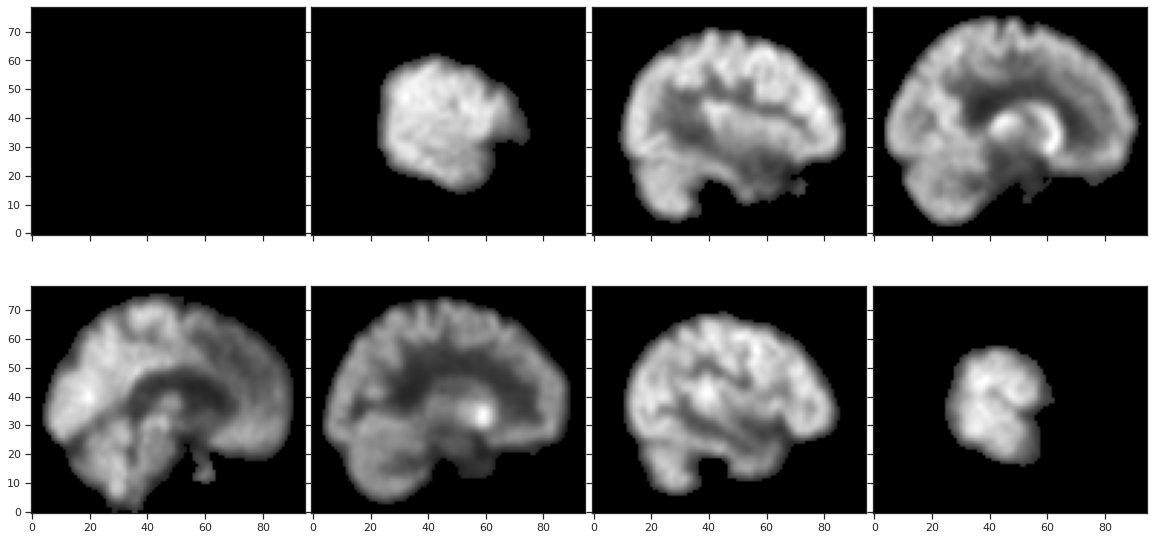

Text(0.5, 0.98, 'Horisonal plane')

<Figure size 432x288 with 0 Axes>

In [64]:
image_slices = [images_AD[:,:,layer] for layer in range(0,images_AD.shape[2], SKIP_LAYERS)]
dplay.display_advanced_plot(image_slices)
plt.suptitle("Horisonal plane")  